In [521]:
import numpy as np
from sklearn.cluster import KMeans
import math

#double moon parameters. w and radiuses are not given, so we assume that w = 5, r = 25, R = 30.
# So, the moons equations are the following:
# large top circle y = sqrt(30^2 - x^2)
# small top circle y = sqrt(25^2 - x^2)
# large bottom circle y = -d - sqrt(30^2 - (x - 27.5)^2)
# large bottom circle y = -d - sqrt(25^2 - (x - 27.5)^2)
w = 5
d = np.array([1,0,-1,-2,-3,-4,-5,-6])
r = 25
R = 30
K = 6

/home/elhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt
/home/elhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in sqrt


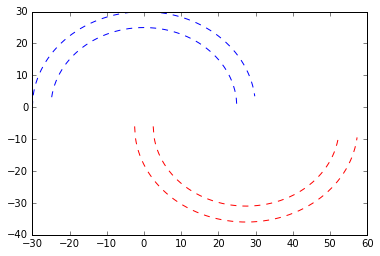

In [522]:
#the moons

import matplotlib.pyplot as plt

%matplotlib inline

# evenly sampled time at 200ms intervals
t_up = np.arange(-30., 30, 0.2)
t_bot = np.arange(-2.5, 57.5, 0.2)

# red dashes, blue squares and green triangles
plt.plot(t_up, np.sqrt(R**2 - t_up**2), 'b--', t_up, np.sqrt(r**2 - t_up**2), 'b--', 
    t_bot, - np.sqrt(R**2 - (t_bot - 27.5)**2) + d[7], 'r--',  t_bot, - np.sqrt(r**2 - (t_bot - 27.5)**2) + d[7], 'r--')
plt.show()

In [523]:
# First we need to generate the points inside the moons:
randomRad = np.random.randint(250, high=300, size=1000)/10.0
randomAngle = np.random.randint(0, high=360, size=1000)

def generate_points(d):
    X_train = np.array([[0, 27]])
    for i in range(len(randomAngle)):
        angle = math.pi*randomAngle[i]/180
        if (randomAngle[i] < 180):
            y = randomRad[i]*math.sin(angle)
            x = randomRad[i]*math.cos(angle)
        else:
            y = randomRad[i]*math.sin(angle) + d
            x = randomRad[i]*math.cos(angle) + 27.5
        point = np.array([x,y])
        X_train = np.row_stack((X_train, point))
    return X_train


X = np.array([generate_points(d[0]), generate_points(d[1]), generate_points(d[2]), generate_points(d[3]),
              generate_points(d[4]), generate_points(d[5]), generate_points(d[6]), generate_points(d[7])]) 
print X[0]

[[  0.          27.        ]
 [  3.14268135 -10.87985808]
 [ 35.18692564 -27.68799704]
 ..., 
 [  2.29332848  -8.67593464]
 [-28.07283614   5.96706553]
 [ 36.7786924  -25.9472794 ]]


In [524]:
#Second step is centroids initialization. We choose 6 centroids for each d randomly from the points:
def init_centroids(X, k):
    centroids = np.array([])
    indices = np.random.randint(0, high=1000, size=k)
    for i in range(k):
        centroids = np.append(centroids, X[indices[i]])
    return centroids.reshape(k,2)
centroids = np.array([])

for i in range(len(d)):
    centroids = np.append(centroids,init_centroids(X[i],K))
centroids = centroids.reshape(len(d),K,2)    
print centroids[0]

[[ -1.00859545e+00   2.88823949e+01]
 [  5.35650273e+01  -1.17127633e+01]
 [ -1.14405606e+01   2.24533644e+01]
 [  4.62051194e+01  -2.12918933e+01]
 [ -2.08196848e+00  -3.30251024e-02]
 [  1.04647798e+01  -2.33288157e+01]]


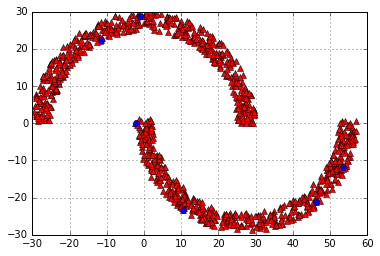

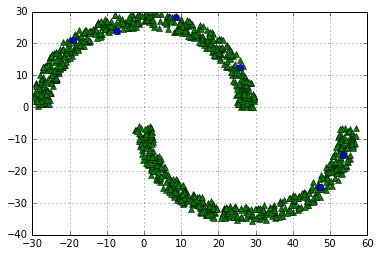

In [525]:
plt.grid(True)
plt.plot(X[0][:,0], X[0][:,1], 'r^', centroids[0][:,0],centroids[0][:,1], 'bo')
plt.show()

plt.grid(True)
plt.plot(X[7][:,0], X[7][:,1], 'g^', centroids[7][:,0],centroids[7][:,1], 'bo')
plt.show()

In [526]:
import scipy.spatial.distance
#find the closest to centroids points
def assign_points_to_centroids(X, centroid_set):
    shortest = np.array([])
    distancies = scipy.spatial.distance.cdist(X, centroid_set)
    for i in range(len(distancies)):
        point_to_cluster = np.array([np.argmin(distancies[i]), np.amin(distancies[i])])
        shortest = np.append(shortest, point_to_cluster)
    return shortest.reshape(len(distancies), 2)

points_in_clusters = np.array([])
for i in range(len(d)):
    points_in_clusters = np.append(points_in_clusters, assign_points_to_centroids(X[i], centroids[i]))
points_in_clusters = points_in_clusters.reshape(len(d), len(X[0]), 2)
print points_in_clusters[0]

[[  0.           2.13557378]
 [  4.          12.03954947]
 [  3.          12.74012315]
 ..., 
 [  4.           9.68726529]
 [  2.          23.41859605]
 [  3.          10.51333185]]


In [527]:
def centroids_moving(X, points_in_clusters, centroid_set):
    return np.array([X[points_in_clusters[:,0] == k].mean(axis=0) for k in range(len(centroid_set))])
centroids_moving(X[0], points_in_clusters[0], centroids[0])

array([[ 10.58352917,  23.50757176],
       [ 49.15019497,  -6.38486603],
       [-20.11592726,  15.87826511],
       [ 38.96297113, -22.98262862],
       [  8.28456532,   0.25118894],
       [ 14.24165462, -21.4098201 ]])

In [528]:
new_position_centr = np.array([])
iterations = np.array([])
for i in range(len(d)):
    iter = 0
    old_position_centr = centroids[i]
    dists = 100
    cluster_points = assign_points_to_centroids(X[i], old_position_centr)
    while(dists > 0.1):
        iter+=1
        #update cluster
        new_position_c = centroids_moving(X[i], cluster_points, old_position_centr)
        #update points
        cluster_points = assign_points_to_centroids(X[i], new_position_c)
        dists = 0
        for j in range(K):
            dists += scipy.spatial.distance.euclidean(old_position_centr[j], new_position_c[j])
        old_position_centr = new_position_c
    iterations = np.append(iterations, iter)    
    new_position_centr = np.append(new_position_centr, new_position_c)
    
new_position_centr = new_position_centr.reshape(len(d),K,2)
print "iterations"
print iterations
print "centroids"
print new_position_centr

iterations
[ 20.  25.  20.  26.  20.  11.  12.  14.]
centroids
[[[  0.92610844  25.99285241]
  [ 50.62953979 -11.54011409]
  [-22.95255291  12.68574427]
  [ 27.29057558 -25.33668427]
  [ 23.11212186  12.13281831]
  [  5.07230541 -12.22041932]]

 [[-24.72197211  10.25675359]
  [ -9.41791481  24.8475712 ]
  [ 25.9551109    7.36385402]
  [  9.83599459 -17.32194037]
  [ 45.55037048 -16.89742576]
  [ 13.39518446  23.09606541]]

 [[ 45.55037048 -17.89742576]
  [  9.83599459 -18.32194037]
  [ 13.39518446  23.09606541]
  [ 25.9551109    7.36385402]
  [-24.72197211  10.25675359]
  [ -9.41791481  24.8475712 ]]

 [[  2.13762038 -10.61760798]
  [ 36.53499978 -27.18578524]
  [ 17.9132765   16.95338452]
  [-18.4559611   16.51611872]
  [ 14.89560908 -25.74003607]
  [ 52.30431263 -12.14684358]]

 [[ 36.02180653 -28.40446544]
  [ 17.9132765   16.95338452]
  [  2.03861631 -11.47042853]
  [ 14.56520767 -26.52968775]
  [ 52.16440342 -13.35447292]
  [-18.4559611   16.51611872]]

 [[-24.63042504  10.3750593

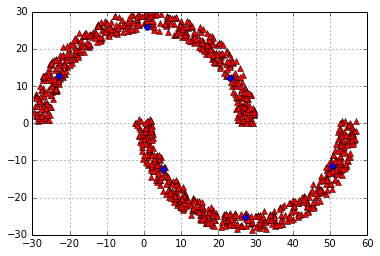

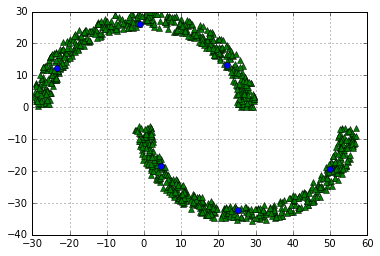

In [529]:
plt.grid(True)
plt.plot(X[0][:,0], X[0][:,1], 'r^', new_position_centr[0][:,0],new_position_centr[0][:,1], 'bo')
plt.show()

plt.grid(True)
plt.plot(X[7][:,0], X[7][:,1], 'g^', new_position_centr[7][:,0],new_position_centr[7][:,1], 'bo')
plt.show()

In [534]:
#a mean and variance calculation

def pair_dist(arr1, arr2):
    summ = 0;
    for i in range(len(arr1)):
        summ += scipy.spatial.distance.euclidean(arr1[i], arr2)
    return summ/len(arr1)
def var_for_cluster(arr1, arr2, mean):
    summ = 0;
    for i in range(len(arr1)):
        summ += (scipy.spatial.distance.euclidean(arr1[i], arr2) - mean)**2
    return summ/(len(arr1) - 1)

def mean_calculation(X, points_in_clusters, centroid_set):
    return np.array([pair_dist(X[points_in_clusters[:,0] == k], centroid_set[k]) for k in range(len(centroid_set))])

def variance_calculation(X, points_in_clusters, centroid_set, mean):
    return np.array([var_for_cluster(X[points_in_clusters[:,0] == k], centroid_set[k], mean[k]) for k in range(len(centroid_set))])

mean = np.array([])
variance = np.array([])
for i in range(len(d)):
    points = assign_points_to_centroids(X[i], new_position_centr[i])
    mean_tmp = mean_calculation(X[i], points, new_position_centr[i])
    mean = np.append(mean, mean_tmp)
    variance_tmp = variance_calculation(X[i], points, new_position_centr[i], mean_tmp)
    variance = np.append(variance, variance_tmp)
mean = mean.reshape(len(d), len(mean_tmp))
variance = variance.reshape(len(d), len(variance_tmp))
print mean
print variance


[[  8.11551501   6.89620468   7.05776613   7.38103096   7.7538904
    7.69813644]
 [  5.45685966   5.78160551   4.91614198  10.67401462  10.94663218
    5.7996544 ]
 [ 10.94663218  10.67401462   5.7996544    4.91614198   5.45685966
    5.78160551]
 [  5.12399471   5.9802248   10.83794335  10.47906663   5.65293167
    5.31845917]
 [  5.96931319  10.83794335   5.03875964   5.58564629   5.44074919
   10.47906663]
 [  5.52657573   4.91614198  10.67401462   5.70120506  10.94663218
    5.7996544 ]
 [  7.7538904    7.05776613   7.31133375   7.46133993   8.11551501
    7.25492557]
 [  7.31133375   8.29599059   7.46133993   6.74378599   7.25492557
    7.71256627]]
[[ 14.62263462  16.0437904   14.86025695  15.14036738  12.38129185
   15.15804983]
 [  7.84305872  10.28209152   6.38976484  29.80877893  26.90941454
    9.23635644]
 [ 26.90941454  29.80877893   9.23635644   6.38976484   7.84305872
   10.28209152]
 [  6.0968976    7.93027525  32.81736714  27.11795529   8.33838342
    7.67798775]
 [  

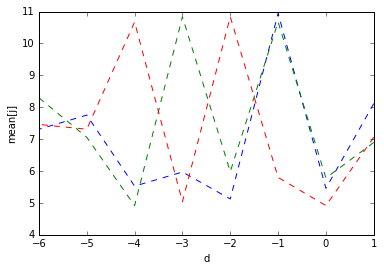

In [531]:
#b
plt.xlabel('d')
plt.ylabel('mean[j]')
colors = ['b--', 'g--', 'r--']

for i in range(3):
    plt.plot(d, mean[:,i], colors[i])
plt.show()

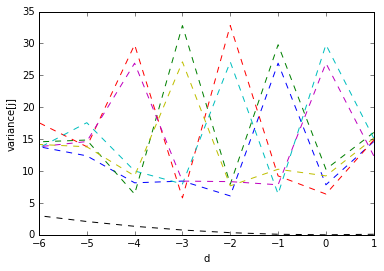

In [532]:
#c
plt.xlabel('d')
plt.ylabel('variance[j]')
colors = ['b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--']

for i in range(6):
    plt.plot(d, variance[:,i], colors[i])
sigma_theor = np.array([])
for i in range(len(d)):
    sigma_theor = np.append(sigma_theor, d[i]**2/2.0/K)
plt.plot(d, sigma_theor, colors[6])
plt.show()

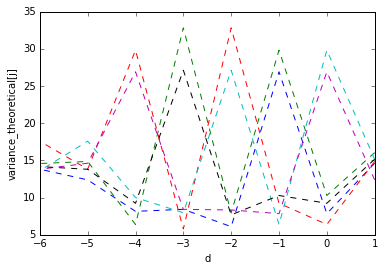

In [533]:
#c
plt.xlabel('d')
plt.ylabel('variance_theoretical[j]')
colors = ['b--', 'g--', 'r--', 'c--', 'm--', 'k--']

for i in range(6):
    plt.plot(d, variance[:,i], colors[i])
plt.show()